In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [84]:
import warnings

warnings.simplefilter("ignore")
# 过滤警告

In [85]:
data1 = pd.read_csv('svmdata1.csv')

In [86]:
print(data1)

          X1      X2  y
0   1.964300  4.5957  1
1   2.275300  3.8589  1
2   2.978100  4.5651  1
3   2.932000  3.5519  1
4   3.577200  2.8560  1
5   4.015000  3.1937  1
6   3.381400  3.4291  1
7   3.911300  4.1761  1
8   2.782200  4.0431  1
9   2.551800  4.6162  1
10  3.369800  3.9101  1
11  3.104800  3.0709  1
12  1.918200  4.0534  1
13  2.263800  4.3706  1
14  2.655500  3.5008  1
15  3.185500  4.2888  1
16  3.657900  3.8692  1
17  3.911300  3.4291  1
18  3.600200  3.1221  1
19  3.035700  3.3165  1
20  1.584100  3.3575  0
21  2.010300  3.2039  0
22  1.952700  2.7843  0
23  2.275300  2.7127  0
24  2.309900  2.9584  0
25  2.828300  2.6309  0
26  3.047300  2.2931  0
27  2.482700  2.0373  0
28  2.505700  2.3853  0
29  1.872100  2.0577  0
30  2.010300  2.3546  0
31  1.226900  2.3239  0
32  1.895100  2.9174  0
33  1.561000  3.0709  0
34  1.549500  2.6923  0
35  1.687800  2.4057  0
36  1.491900  2.0271  0
37  0.962000  2.6820  0
38  1.169300  2.9276  0
39  0.812200  2.9992  0
40  0.973500  3.

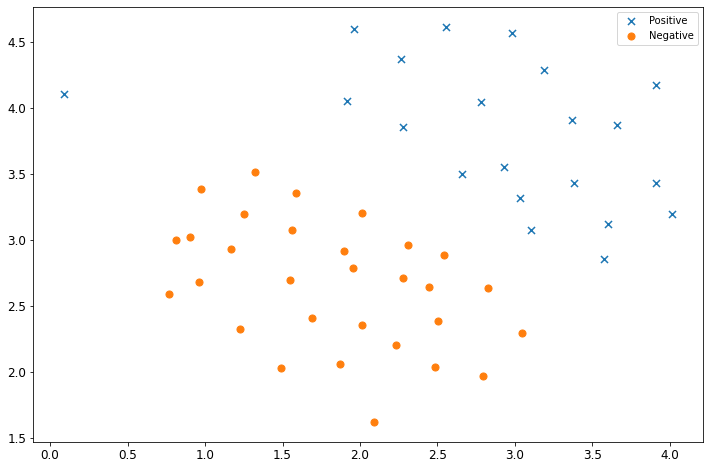

In [87]:
positive = data1[data1['y'].isin([1])]
negative = data1[data1['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')
ax.legend()
plt.show()

In [88]:
from sklearn import svm
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
svc

LinearSVC(C=1, loss='hinge')

首先，我们使用 C=1 看下结果如何。

In [89]:
svc.fit(data1[['X1', 'X2']], data1['y'])
svc.score(data1[['X1', 'X2']], data1['y'])

0.9803921568627451

其次，让我们看看如果C的值越大，会发生什么

In [90]:
svc2 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)
svc2.fit(data1[['X1', 'X2']], data1['y'])
svc2.score(data1[['X1', 'X2']], data1['y'])

0.8823529411764706

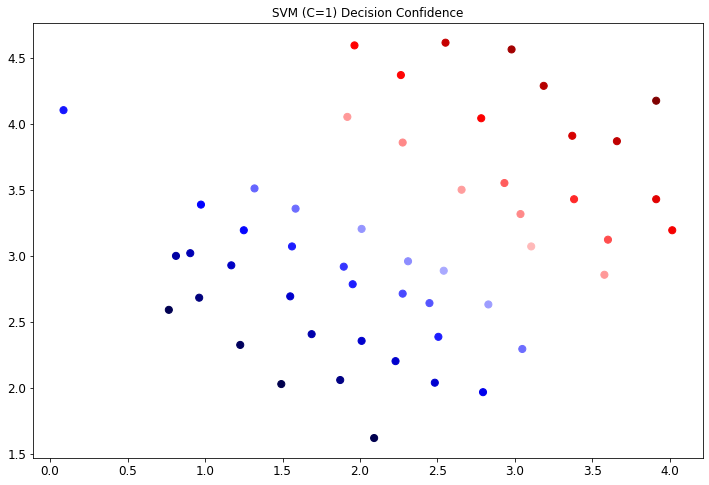

In [91]:
data1['SVM 1 Confidence'] = svc.decision_function(data1[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data1['X1'],
           data1['X2'],
           s=50,
           c=data1['SVM 1 Confidence'],
           cmap='seismic')
ax.set_title('SVM (C=1) Decision Confidence')
plt.show()

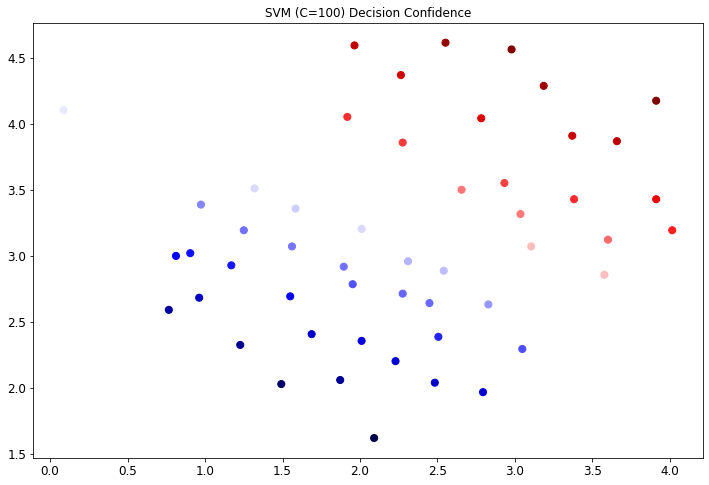

In [92]:
data1['SVM 2 Confidence'] = svc2.decision_function(data1[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data1['X1'], data1['X2'], s=50, c=data1['SVM 2 Confidence'], cmap='seismic')
ax.set_title('SVM (C=100) Decision Confidence')
plt.show()

In [93]:
def gaussian_kernel(x1, x2, sigma):
    return np.exp(-(np.sum((x1 - x2)**2) / (2 * (sigma**2))))

In [94]:
x1 = np.array([1.0, 2.0, 1.0])
x2 = np.array([0.0, 4.0, -1.0])
sigma = 2

gaussian_kernel(x1, x2, sigma)

0.32465246735834974

In [95]:
data2 = pd.read_csv('svmdata2.csv')

In [96]:
data2.head()
print(data2)

           X1        X2  y
0    0.107143  0.603070  1
1    0.093318  0.649854  1
2    0.097926  0.705409  1
3    0.155530  0.784357  1
4    0.210829  0.866228  1
..        ...       ... ..
858  0.994240  0.516667  1
859  0.964286  0.472807  1
860  0.975806  0.439474  1
861  0.989631  0.425439  1
862  0.996544  0.414912  1

[863 rows x 3 columns]


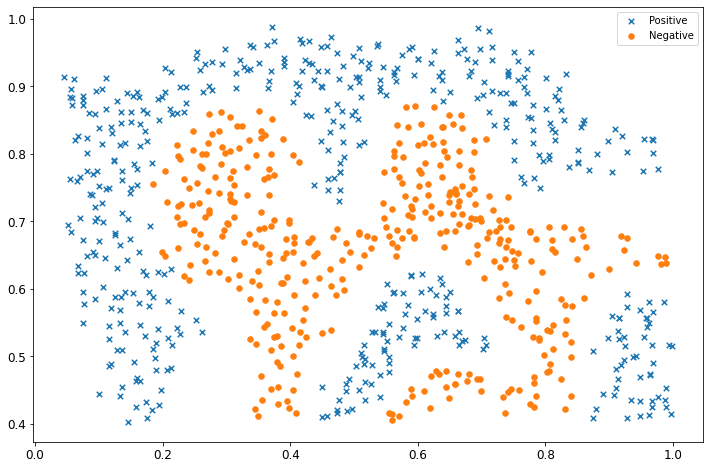

In [98]:
positive = data2[data2['y'].isin([1])]
negative = data2[data2['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')
ax.legend()
plt.show()

In [99]:
svc = svm.SVC(C=100, gamma=10, probability=True)
svc

SVC(C=100, gamma=10, probability=True)

In [100]:
svc.fit(data2[['X1', 'X2']], data2['y'])
svc.score(data2[['X1', 'X2']], data2['y'])

0.9698725376593279

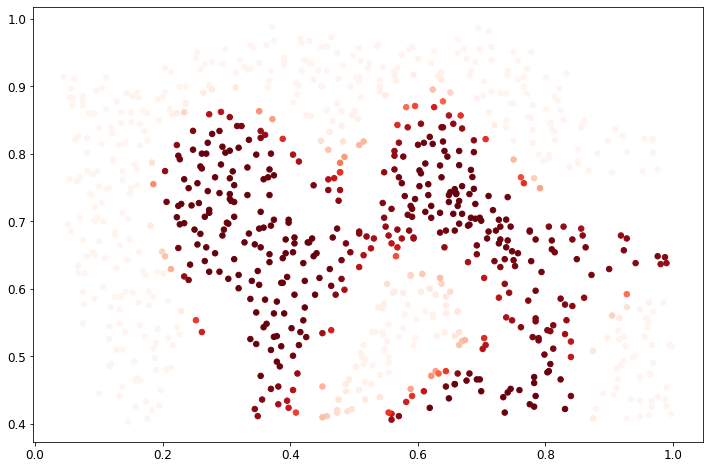

In [101]:
data2['Probability'] = svc.predict_proba(data2[['X1', 'X2']])[:, 0]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data2['X1'], data2['X2'], s=30, c=data2['Probability'], cmap='Reds')
plt.show()

In [102]:
data3=pd.read_csv('svmdata3.csv')
data3val=pd.read_csv('svmdata3val.csv')

In [103]:
X = data3[['X1','X2']]
Xval = data3val[['X1','X2']]
y = data3['y'].ravel()
yval = data3val['yval'].ravel()

In [105]:
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0
best_params = {'C': None, 'gamma': None}

for C in C_values:
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(X, y)
        score = svc.score(Xval, yval)

        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma

best_score, best_params

(0.965, {'C': 0.3, 'gamma': 100})